<a href="https://colab.research.google.com/github/sk-safi/Diwali_Sales-Analysis/blob/main/Diwali_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("Diwali Sales Data.csv", encoding = 'unicode_escape')
#to avoid encoding error use 'unicode_escape'

(11251, 15)

In [ ]:
df.shape

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.drop(['Status','unnamed1'],axis = 1,inplace = True)

In [ ]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
df.shape

(11251, 13)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [ ]:
df['Amount'] = df['Amount'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [ ]:
#df.rename(columns={'Orders':'No_of_orders'})

In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [ ]:
df[['Age','Amount','Orders']].describe()

,Age,Amount,Orders
count,11239.000000,11239.000000,11239.000000
mean,35.410357,9453.610553,2.489634
std,12.753866,5222.355168,1.114967
min,12.000000,188.000000,1.000000
25%,27.000000,5443.000000,2.000000
50%,33.000000,8109.000000,2.000000
75%,43.000000,12675.000000,3.000000
max,92.000000,23952.000000,4.000000


#Exploratory Data Analysis

In [ ]:
a = sns.countplot(x = 'Gender', data = df)
for bars in a.containers:
    a.bar_ladel(bars)

NameError: name 'df' is not defined

<Axes: xlabel='Gender', ylabel='Amount'>

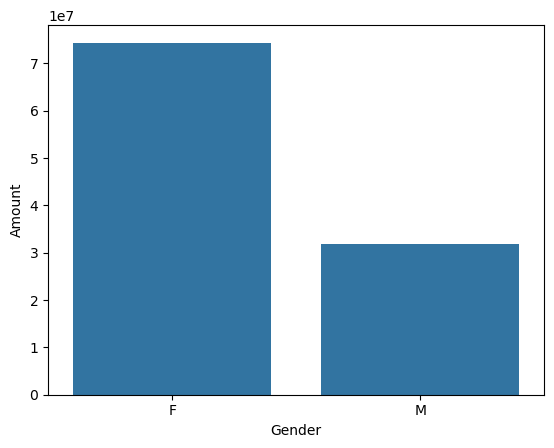

In [ ]:
#Sort total amount purchesed Groupby M or F and plot the data
Sales = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values('Amount',ascending = False)
Sales
sns.barplot(x = 'Gender',y = 'Amount',data = Sales)

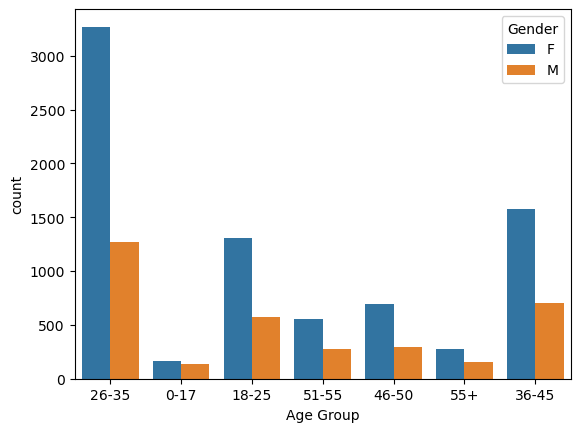

In [ ]:
ax=sns.countplot(data = df, x= 'Age Group', hue='Gender')
#for bars in ax.containers:
  #  ax.bar_ladel(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

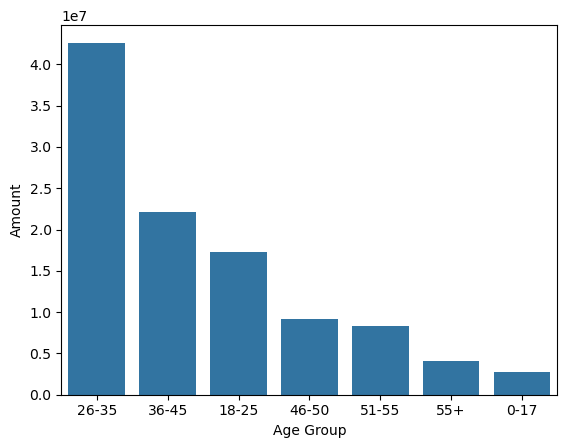

In [ ]:
Sales_Age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values('Amount',ascending = False)
Sales_Age
sns.barplot(x = 'Age Group',y = 'Amount',data = Sales_Age)

Most of the byers are age group between 26-35 female

States

<Axes: xlabel='State', ylabel='Orders'>

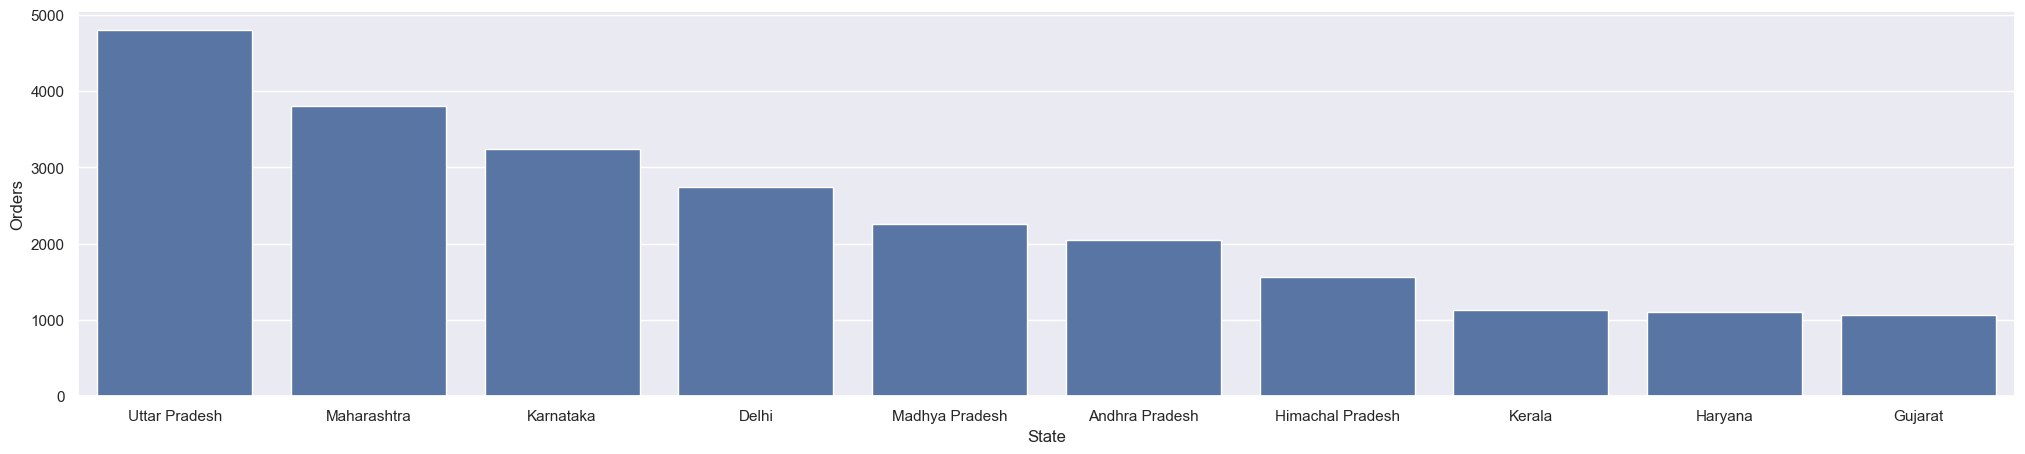

In [ ]:
Sales_State = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values('Orders',ascending = False).head(10)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x = 'State',y = 'Orders',data = Sales_State)

<Axes: xlabel='State', ylabel='Amount'>

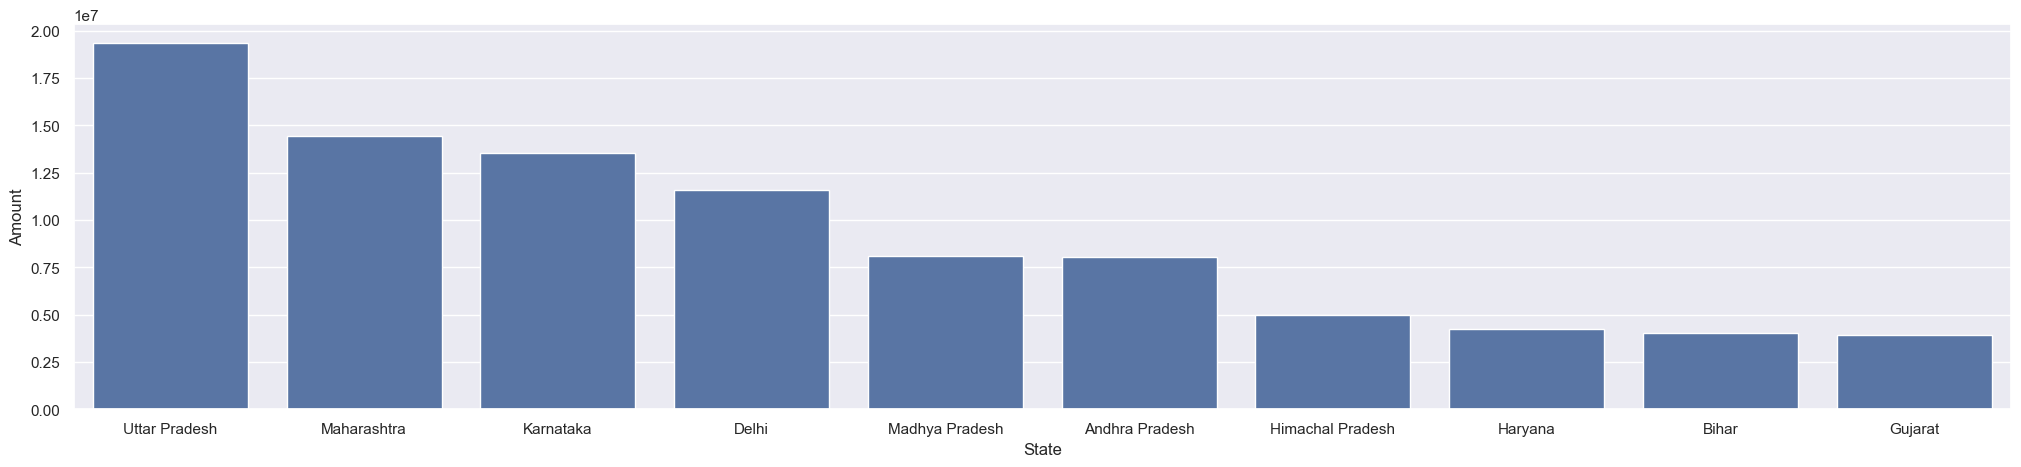

In [ ]:
Sales_State = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values('Amount',ascending = False).head(10)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x = 'State',y = 'Amount',data = Sales_State)

Most of the perches are from Utter_pradesh, Maharastra, Karnataka

Marital_Status

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

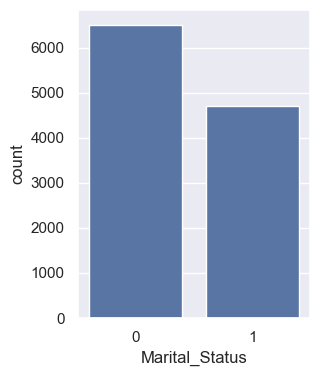

In [ ]:
sns.set(rc={"figure.figsize":(3, 4)})
ax=sns.countplot(data = df, x= 'Marital_Status')


<Axes: xlabel='Marital_Status', ylabel='Amount'>

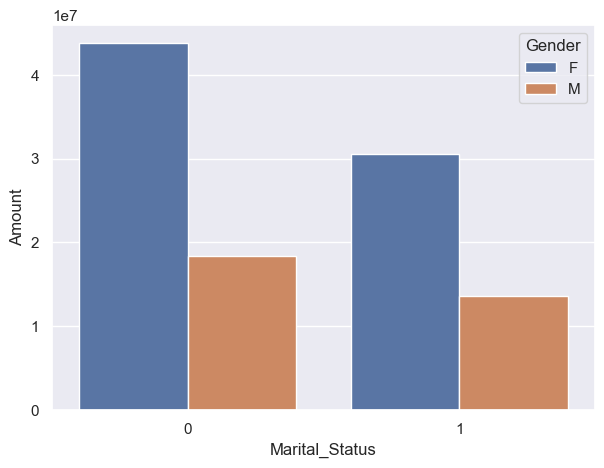

In [ ]:
Sales_State = df.groupby(['Marital_Status','Gender'],as_index = False)['Amount'].sum().sort_values('Amount',ascending = False).head(10)
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x = 'Marital_Status',y = 'Amount',data = Sales_State,hue='Gender')

Most of the byers are maried women

Occupation

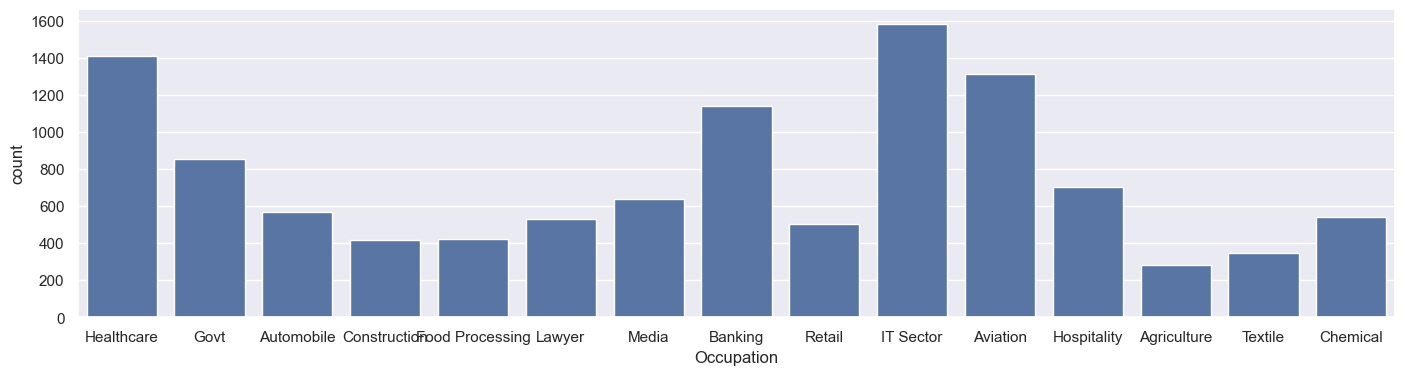

In [ ]:
sns.set(rc={"figure.figsize":(17, 4)})
ax=sns.countplot(data = df, x= 'Occupation')

<Axes: xlabel='Occupation', ylabel='Amount'>

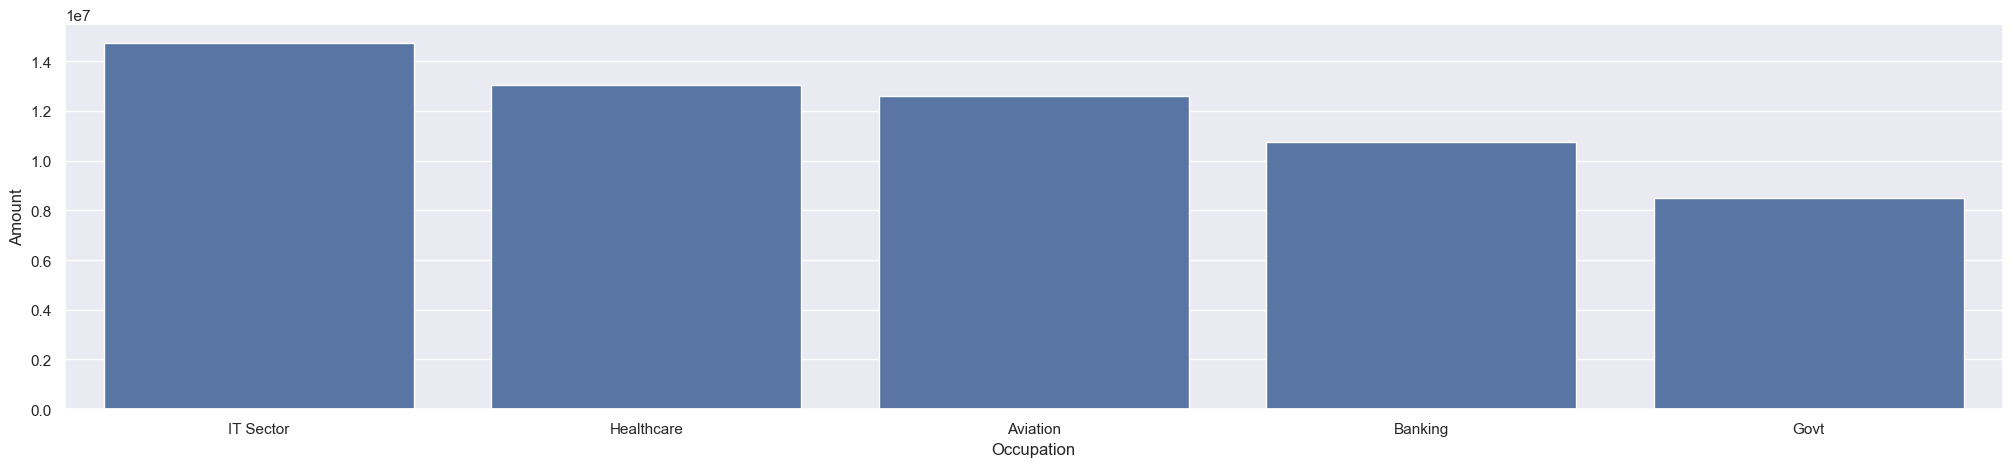

In [ ]:
Sales_State = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values('Amount',ascending = False).head()
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x = 'Occupation',y = 'Amount',data = Sales_State)

Most of the byers are workin in it_sectors , Healthcare , Aviation_occupation and banking

Product_Category

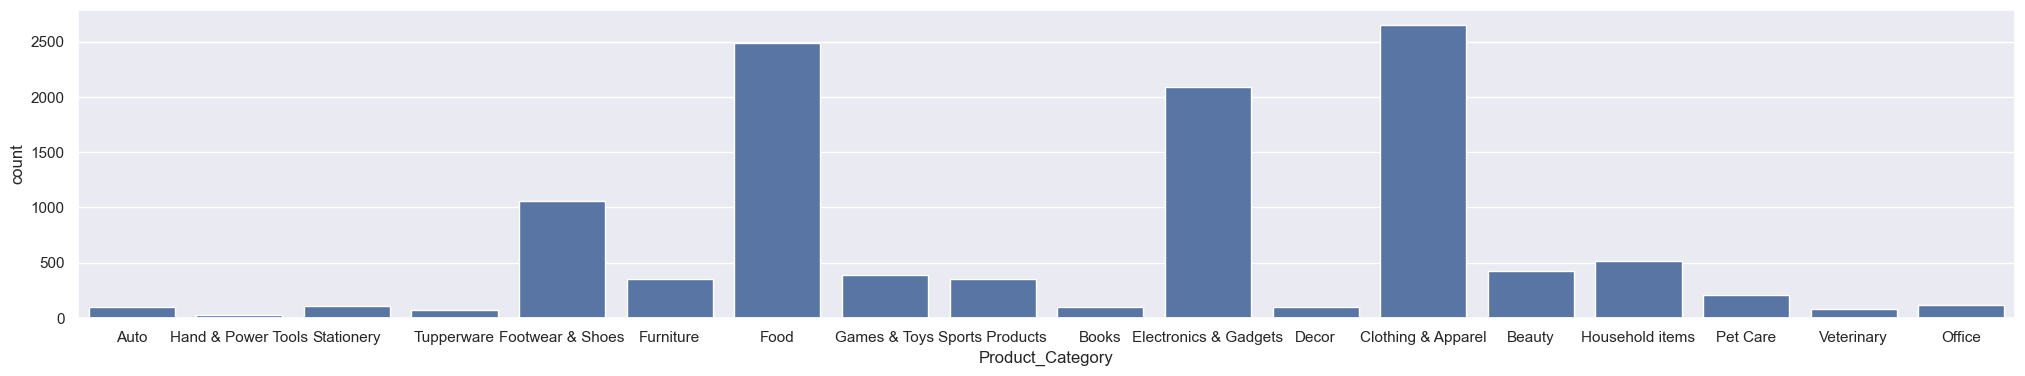

In [ ]:
sns.set(rc={"figure.figsize":(25, 4)})
ax=sns.countplot(data = df, x= 'Product_Category')

<Axes: xlabel='Product_Category', ylabel='Amount'>

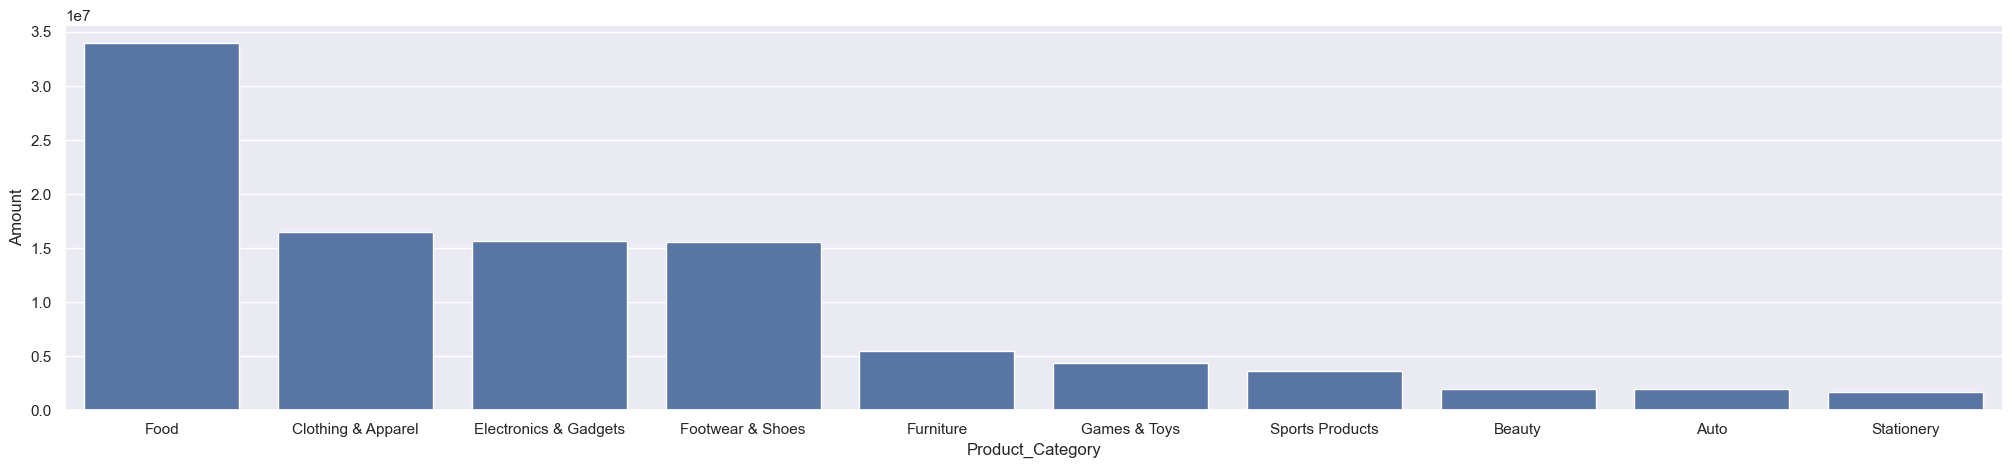

In [ ]:
Sales_State = df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values('Amount',ascending = False).head(10)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x = 'Product_Category',y = 'Amount',data = Sales_State)